# 3 - hp refinement example using MPT-Calculator

The accuracy of the computed MPT coefficients depend on the discretisation used to discretise the transmission problem for ${\boldsymbol \theta}_i^{(0)}$ and ${\boldsymbol \theta}_i^{(1)}$, which in turn are used to compute the MPT coefficients. The accuracy of the solution depends on the order of the elements and the size and distribution of the tetrahedra in the mesh. To ensure that the solution is accurate, we refine the discretisation until convergence of the solution is achieved.

There are two alternative types of refinement $p$ refinement, which involves enrichment of the element order, and $h$ refinement, which involves using a finer mesh of tetrahedral elements (either locally or globally). Note that we only consider global enrichment of the element order.

In [1]:
# This bit code allows a python file to be changed and then for the updates to be available without restarting
# the jupyter kernal
%load_ext autoreload
%autoreload 2

from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path='/home/james/Desktop/Updated_MPT_Calculator/MPT-Calculator'
os.chdir(Your_Path)
os.getcwd()


'/home/james/Desktop/Updated_MPT_Calculator/MPT-Calculator'

In [2]:
from main import main

importing NGSolve-6.2.2204


## $p$ - Refinement

In this example, we wish to explore the effect of changing the polynomial order of the $\boldsymbol{H}(curl)$ discretisation. We expect that increasing the order $p$ from $p=0\rightarrow p=1\rightarrow p=2\rightarrow p=3$ will result in a more accurate simulation at the cost of an increased computational time.

For control over the order we want to specify $p$ as an input argument
```python
main(order=p)
```
which can be done iteratively


sphere.geo
generating mesh
 problems solved        
 matrices computed       
 eigenvalue problem solved    
 maximum recomeneded frequency is  14992992
 mesh contains 2547 elements
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solved theta0 problems    
 solving theta1 snapshots
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solving theta1
 solving theta1 20/23    
 solving theta1 21/23    
manually closed pool3    
 SVD complete                
0 : [0.002121848828223959]del
1 : [0.002012027323742797]
2 : [0.001971816020163756]
3 : [0.00193746644219155]
4 : [0.0019086658924176046]
5 : [0.0018867343392717966]
6 : [0.0018711889194613616]
7 : [0.0018606771813467417]
8 : [0.0018537406951349249]
9 : [0.0018491914562127375]
10 : [0.0018461791987485715]
11 : [0.0018441345308146694]
12 : [0.0018426948361894527]
13 : [0.001841631376108616]
14 : [0.001840804997935145]
15 : [0.001840129532121716]
16

39 : [0.0013400793000422]
40 : [0.0013385403863567565]
41 : [0.0013370925223242444]
42 : [0.0013357287672236223]
43 : [0.0013344435074215683]
44 : [0.0013332309867758086]
45 : [0.0013320865016311861]
46 : [0.0013310052412453589]
47 : [0.001329983235406456]
48 : [0.0013290164345040113]
49 : [0.0013281014648015327]
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
manually closed pooler system 39/40    
 reduced order systems solved          
 frequency sweep complete


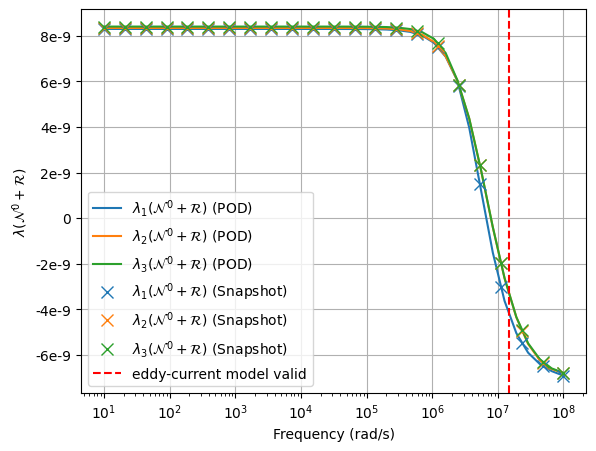

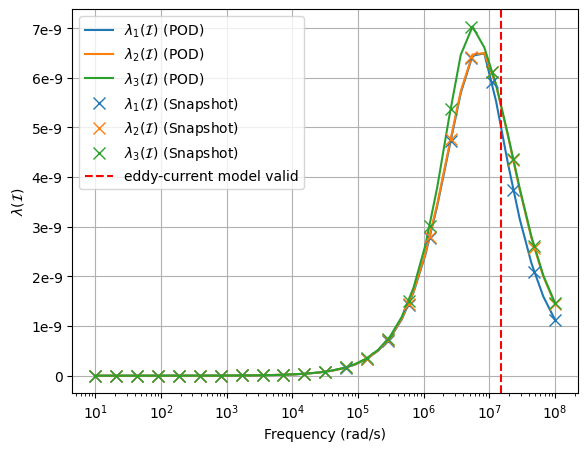

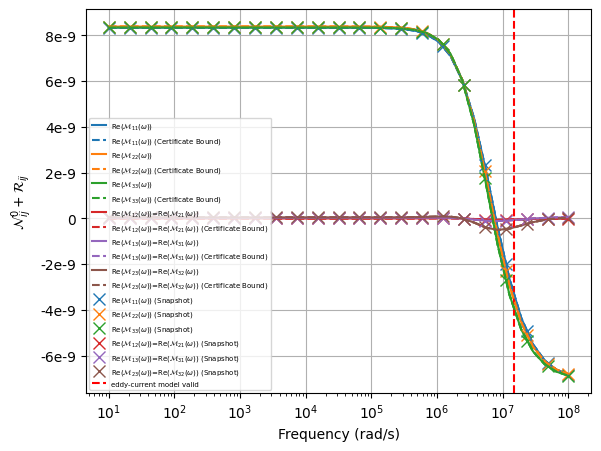

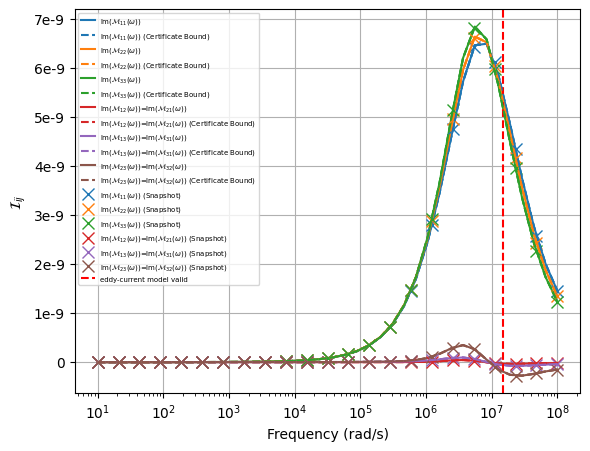

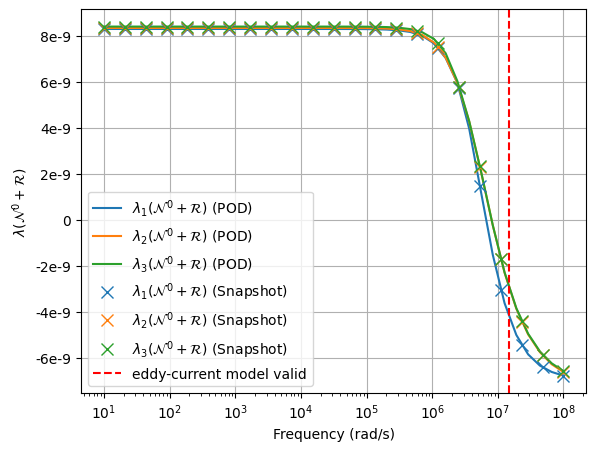

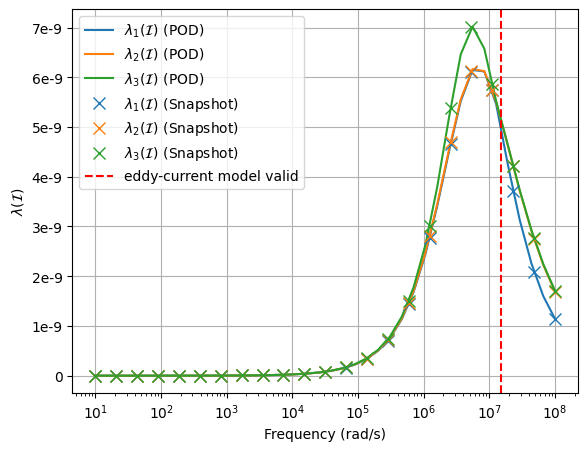

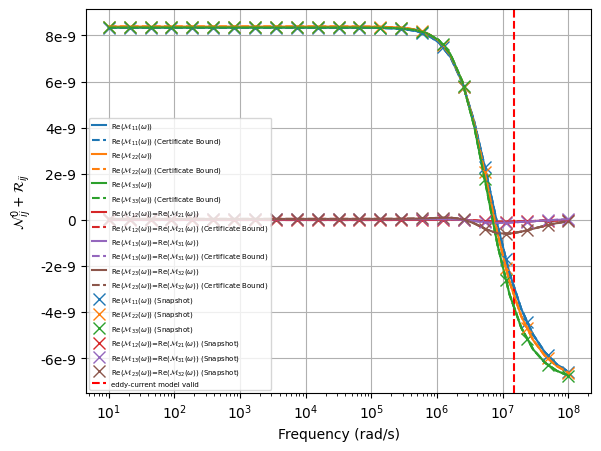

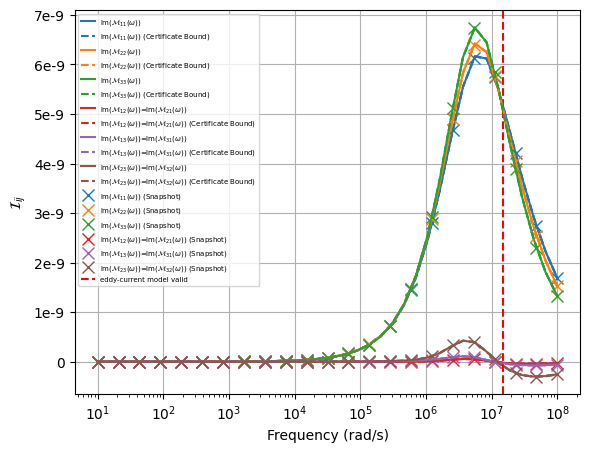

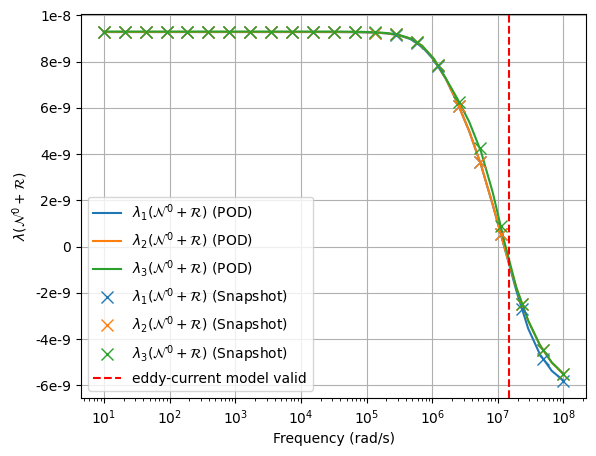

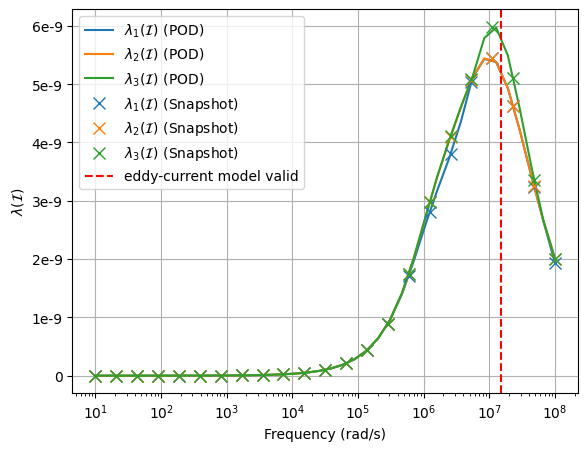

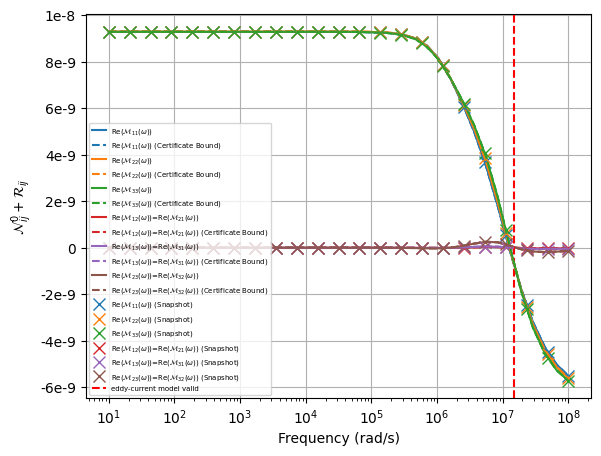

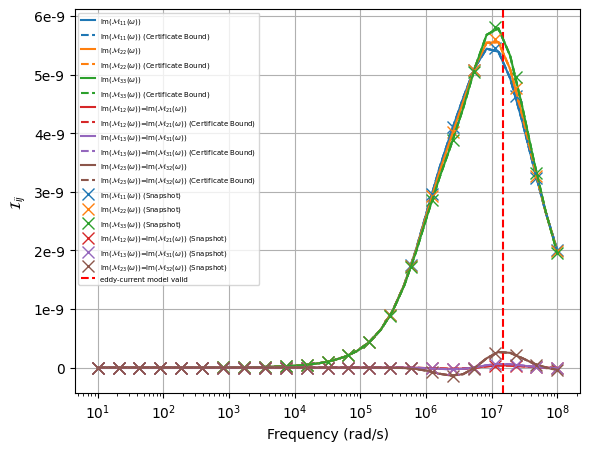

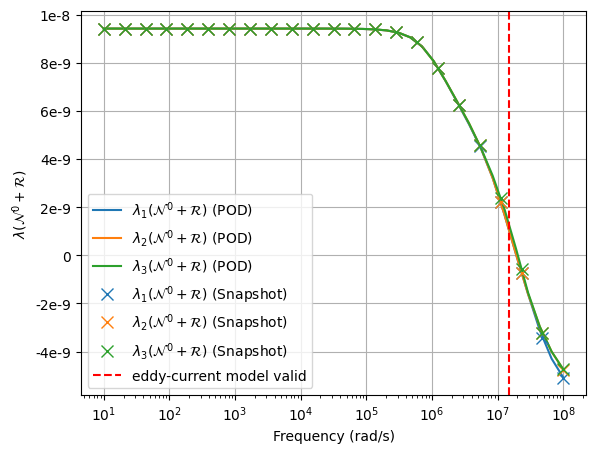

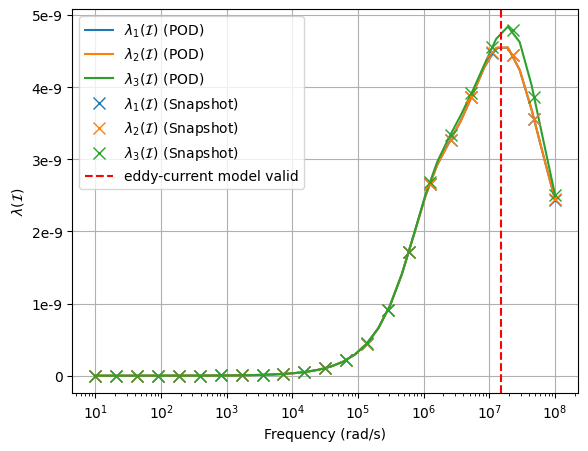

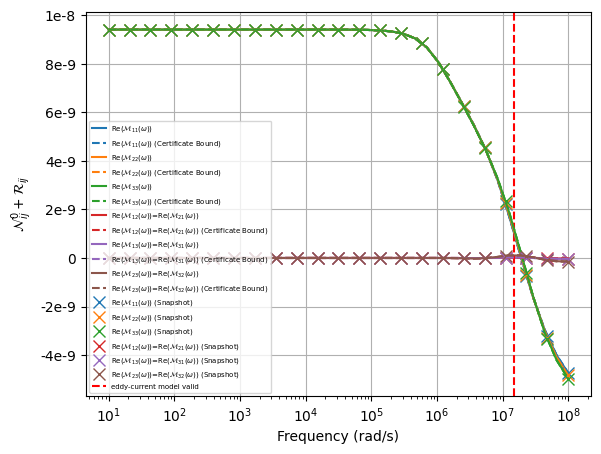

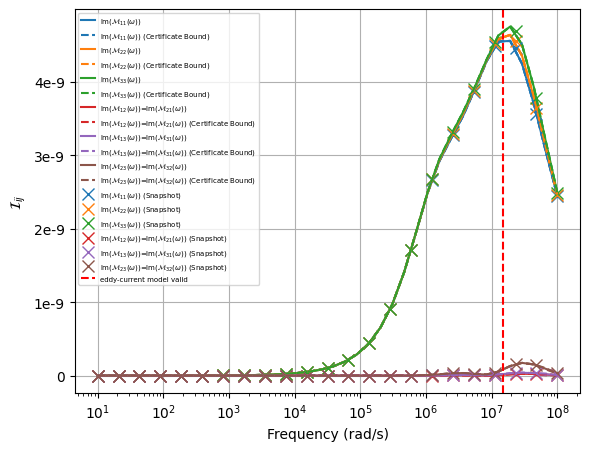

In [3]:
comparison_eig_p = np.zeros((40,4), dtype=complex)
comparison_ndofs_p = np.zeros(4)
start_time = time()
for p in [0,1,2,3]:
    Return_Dict = main(use_POD=True, order=p)
    comparison_eig_p[:,p] = Return_Dict['EigenValues'][:,0]
    comparison_ndofs_p[p] = Return_Dict['NDOF'][1]
stop_time = time()

In [4]:
print(f'Total computation time (p refinement) = {(stop_time - start_time)/60} minutes')

Total computation time (p refinement) = 2.772716232140859 minutes


Plotting the first eigenvalue for the different $p$, shows that the solutions are in agreement upto $\sim 10^6$ rad/s, after which the solutions begin to diverge.

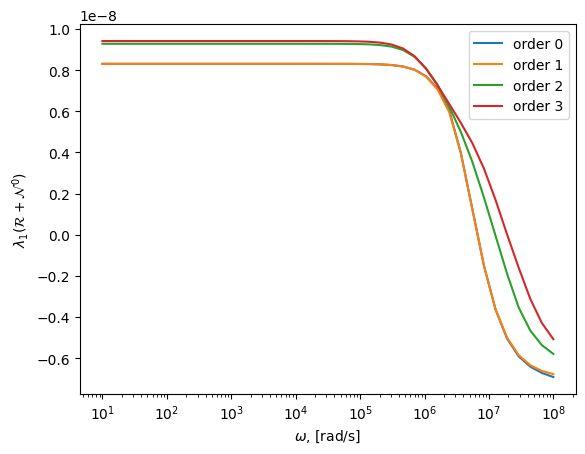

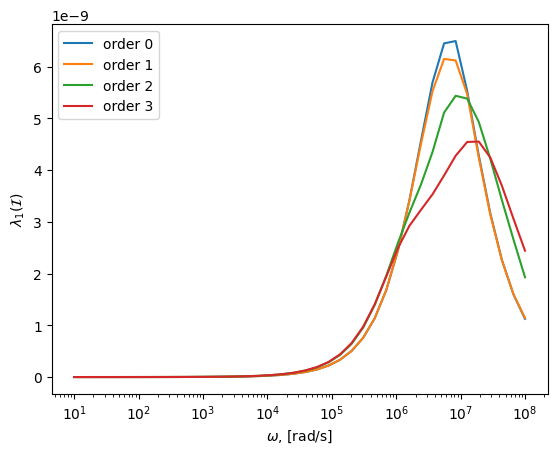

In [5]:
plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_p[:,p].real, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_p[:,p].imag, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');

We can see that increasing the order leads to a rapid convergence of the soluion. Already using order 3 give a solution that is converged upto $10^7$ rad/s and this can be improved for high frequencies by further increasing the order. The problem solved is a magnetic sphere, if instead $\mu_r=1$ was chosen then a more accurate solution can be achieved for the same discretisation. This is becuase the skin depth is less changing to capature in this case. Later tutorials will address how to change the materials and object geometry.

## $h$ - Refinement

Similarly to refining $p$, we can also increase the density of the mesh, to provide finer spatial resolution. In this example, we reduce the maximum element size in the mesh and observe that this provides a more accurate solution.

To set a maximum element size for a quasi-uniform mesh, we use the $\texttt{h}$ argument in $\texttt{main}$. For example, to set the max element size to 1 over the entire mesh we would use
```python
main(h=1)
```
which can also be done iterativly to generate a quasi-uniform mesh over the entire domain. Note that setting h=1 controls the maximum size in the mesh (not the size of all elements).

Alternativly, we can use the Netgen mesh sizing tags, $\texttt{'verycoarse'}$, $\texttt{'coarse'}$, $\texttt{'moderate'}$, $\texttt{'fine'}$, and $\texttt{'veryfine'}$ to specify a object size dependent discretisation.

e.g.
```python
main(h='coarse')
```

The mesh resulting from using $\texttt{coarse}$ is non-uniform.

Solving for h=verycoarse
sphere.geo
generating mesh
 problems solved        
 matrices computed       
 eigenvalue problem solved    
 maximum recomeneded frequency is  634587
 mesh contains 401 elements
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solved theta0 problems    
 solving theta1 snapshots
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solving theta1
 solving theta1 17/23    
 solving theta1 20/23    
manually closed pool3    
 SVD complete                
0 : [0.001981297373763103]del
1 : [0.0018419420964738695]
2 : [0.001821172492719341]
3 : [0.0018078823801517578]
4 : [0.0017966174031593541]
5 : [0.0017873165157144986]
6 : [0.0017798893660421512]
7 : [0.0017741219225468918]
8 : [0.0017697262131767051]
9 : [0.0017664204921917061]
10 : [0.0017639520272749664]
11 : [0.0017621127342626133]
12 : [0.0017607394337529087]
13 : [0.0017597064398540807]
14 : [0.001758921406613105]
15 :

36 : [0.0019683239095508362]
37 : [0.001968072067401583]
38 : [0.001967851429770334]
39 : [0.001967656651648268]
40 : [0.0019674839686072165]
41 : [0.0019673294717169544]
42 : [0.0019671905637991564]
43 : [0.001967064406278103]
44 : [0.0019669492270925765]
45 : [0.001966842978379718]
46 : [0.0019667444607155953]
47 : [0.0019666522074262894]
48 : [0.001966565410921657]
49 : [0.0019664830296767764]
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
manually closed pooler system 38/40    
 reduced order systems solved          
 frequency sweep complete


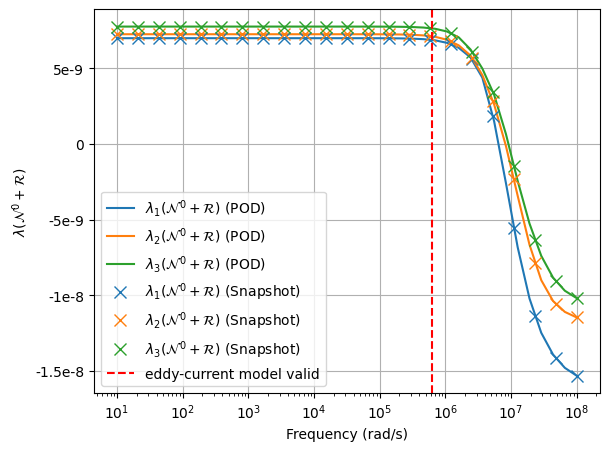

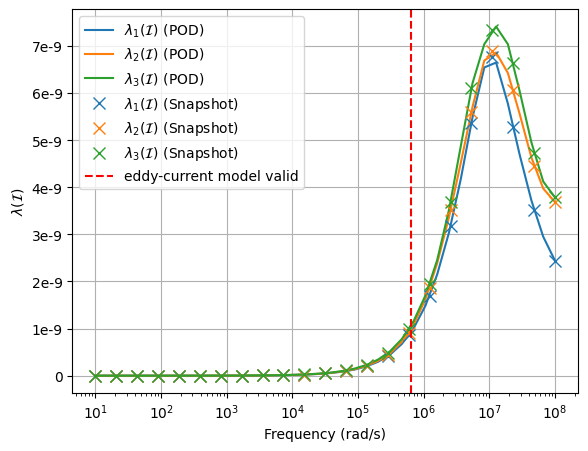

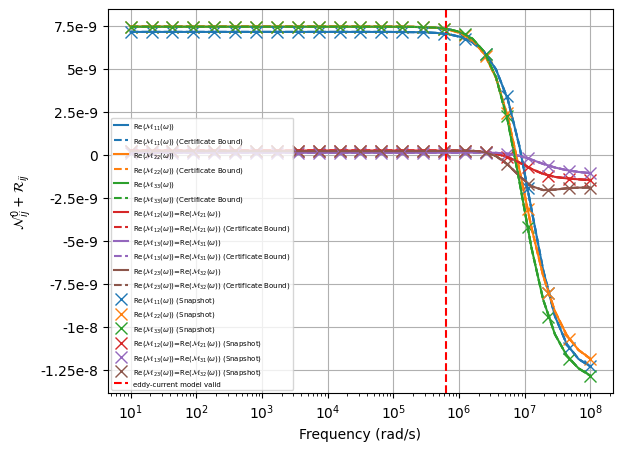

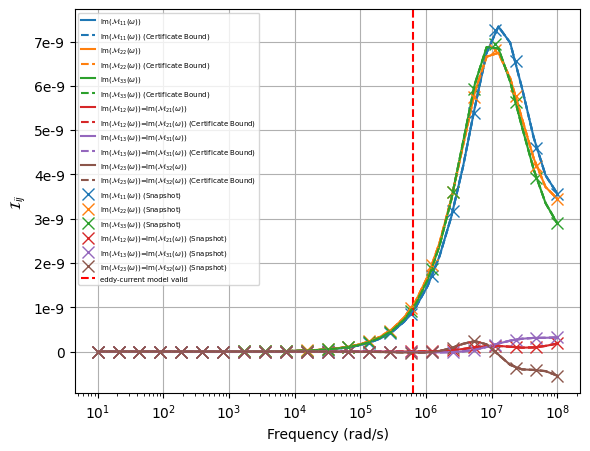

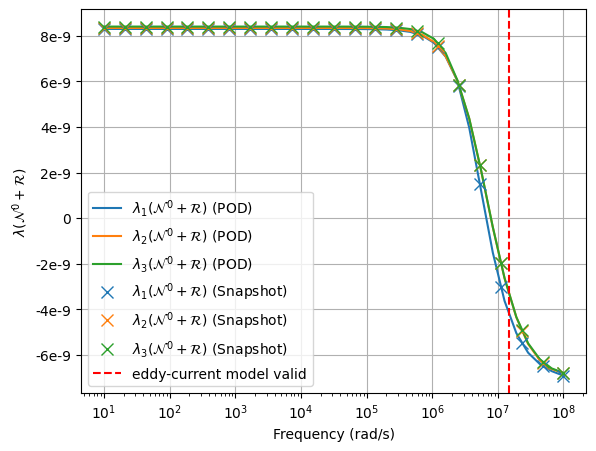

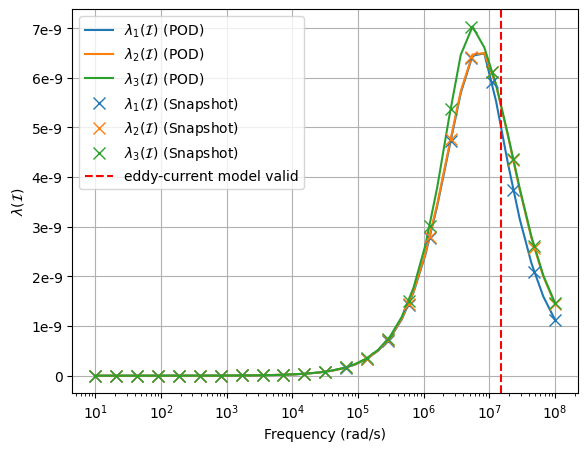

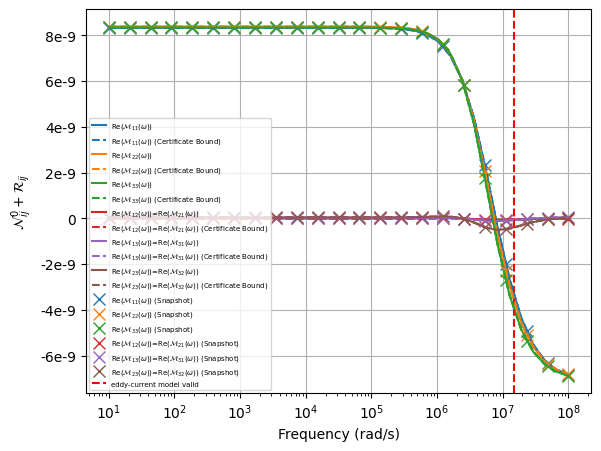

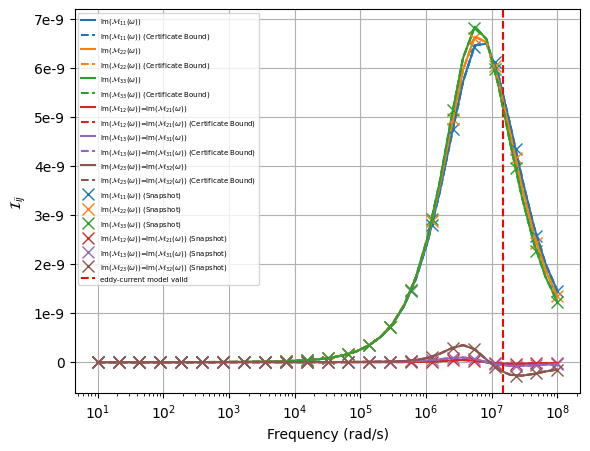

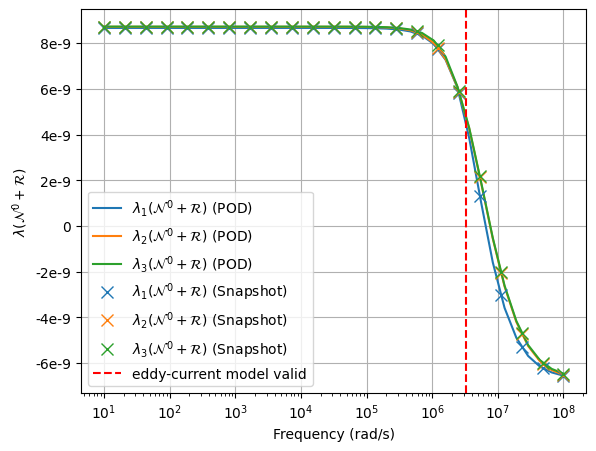

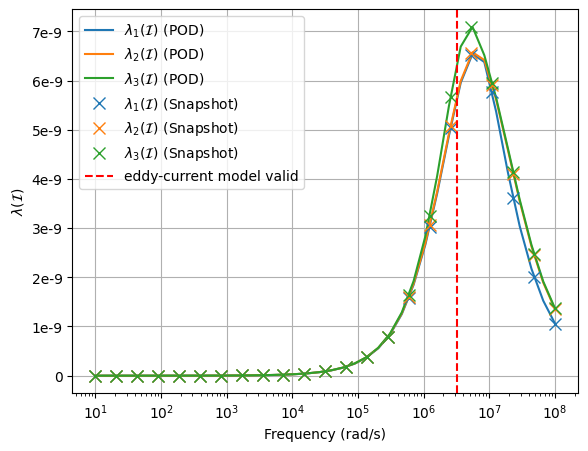

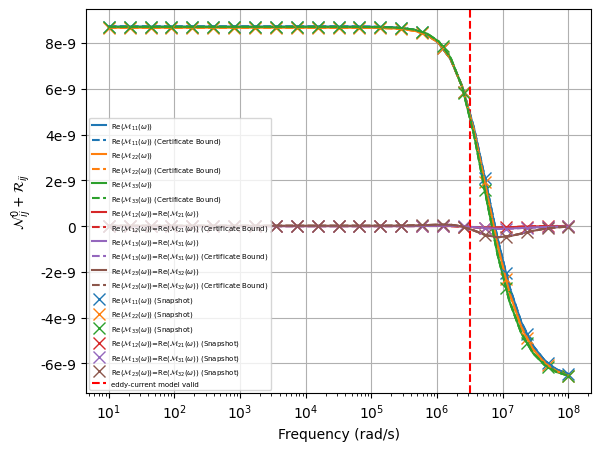

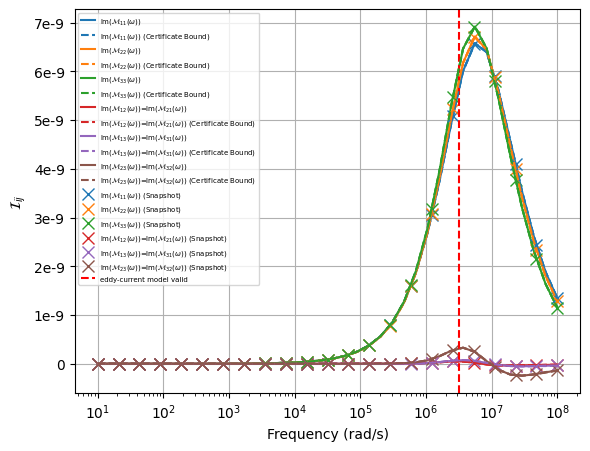

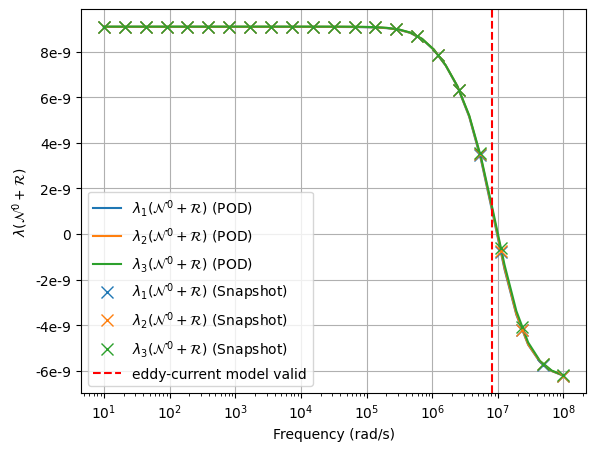

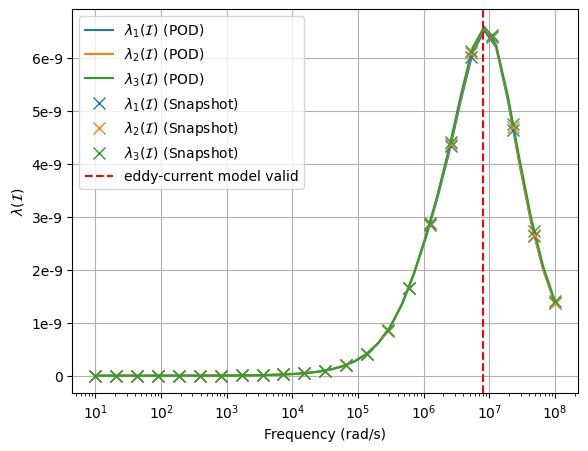

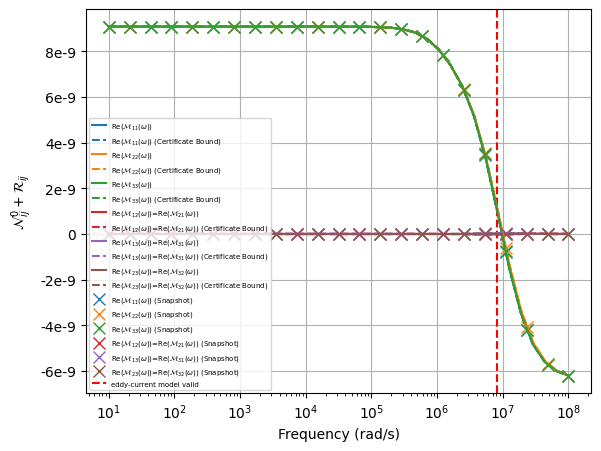

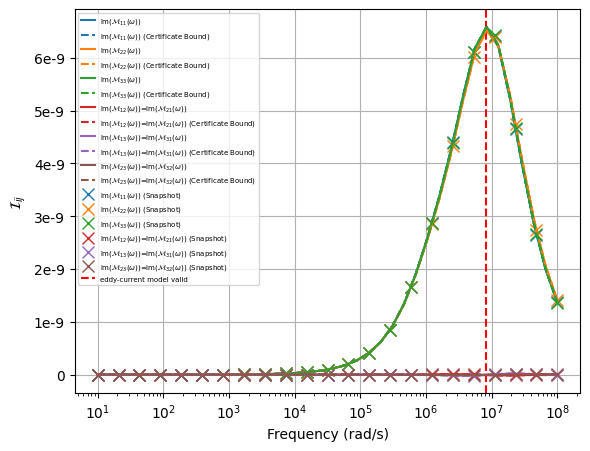

In [6]:
comparison_eig_h = np.zeros((40,4), dtype=complex)
comparison_ndofs_h = np.zeros(4)
h_array = ['verycoarse', 'coarse', 'moderate', 'fine']
start_time = time()
for n, h in enumerate(h_array):
    print(f'Solving for h={h}')
    Return_Dict = main(use_POD=True, order=0, h=h)
    comparison_eig_h[:,n] = Return_Dict['EigenValues'][:,0]
    comparison_ndofs_h[n] = Return_Dict['NDOF'][1]
stop_time = time()

In [7]:
print(f'Total computation time (h refinement) = {(stop_time - start_time)/60} minutes')

Total computation time (h refinement) = 4.892554807662964 minutes


As before, plotting the first eigenvalue shows the effect of refining the mesh. 

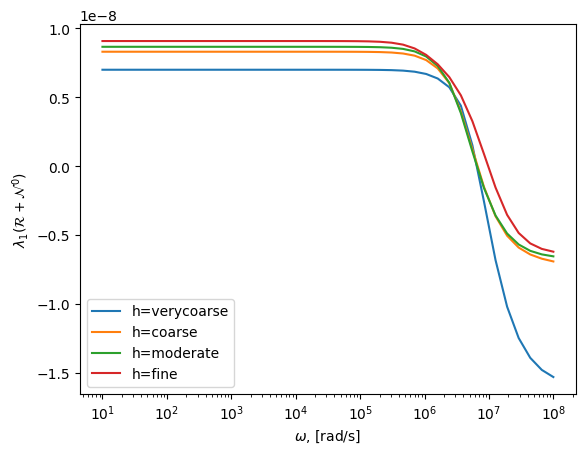

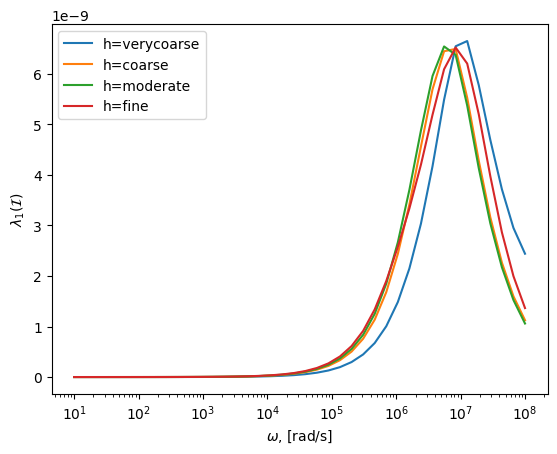

In [8]:
plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_h[:,h].real, label=f'h={h_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_h[:,h].imag, label=f'h={h_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');


While the resulting curves look similar for the different meshes, the solutions are along way from the true solution as we will see shortly. To capture an accurate solution for this sphere would require a very dense mesh.

Given this, and comparing the computation times for $p$ and $h$ refinements, we see that in this case $p$ refinement is significantly more effective.

We can more clearly see this benefit by plotting the approximated eigenvalues against the exact solution for a conducting permeable sphere.

<b>Note: In general, we do not have an exact solution to the rank 2 MPT for all objects, so this comparison with an exact solution only works with a sphere.</b>

In MPT-Calculator, we have a function to calculate the exact solution for a sphere.

In [9]:
from Functions.Helper_Functions.exact_sphere import exact_sphere

In [10]:
frequency_index = 38
alpha =1e-3
sigma = 1e6
mur = 10
epsilon = 0
omega = Return_Dict['FrequencyArray'][frequency_index]

exact_solution = exact_sphere(alpha, epsilon, mur, sigma, omega)

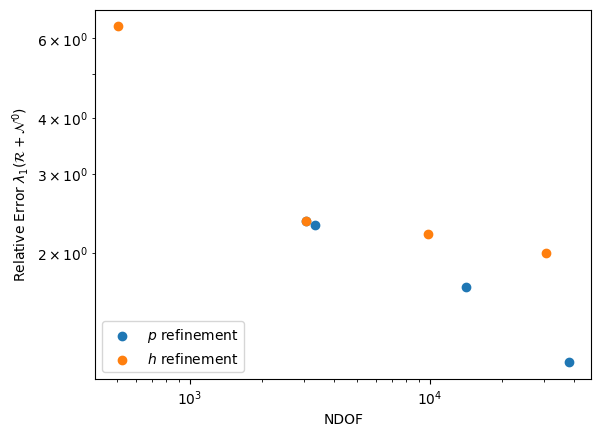

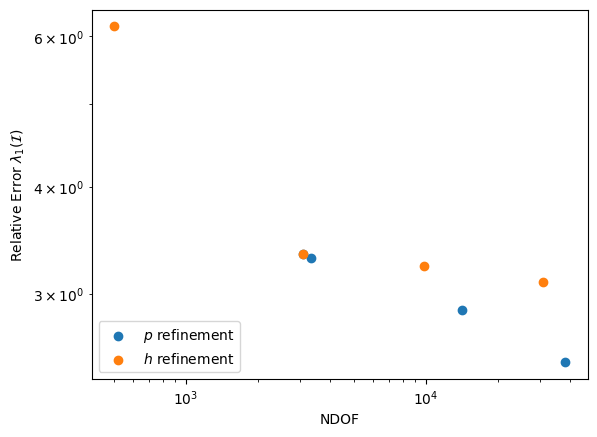

In [11]:
relative_error_real_p = np.zeros(4)
relative_error_imag_p = np.zeros(4)
relative_error_real_h = np.zeros(4)
relative_error_imag_h = np.zeros(4)

for p in [0,1,2,3]:
    relative_error_real_p[p] = np.abs((comparison_eig_p[frequency_index,p].real - exact_solution.real)) / np.abs(exact_solution.real)
    relative_error_imag_p[p] = np.abs((comparison_eig_p[frequency_index,p].real - exact_solution.imag)) / np.abs(exact_solution.imag)

for h in [0,1,2,3]:
    relative_error_real_h[h] = np.abs((comparison_eig_h[frequency_index,h].real - exact_solution.real)) / np.abs(exact_solution.real)
    relative_error_imag_h[h] = np.abs((comparison_eig_h[frequency_index,h].real - exact_solution.imag)) / np.abs(exact_solution.imag)

    
plt.figure()    
plt.scatter(comparison_ndofs_p, relative_error_real_p, label='$p$ refinement')
plt.scatter(comparison_ndofs_h, relative_error_real_h, label='$h$ refinement')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(loc='lower left')
plt.ylabel('Relative Error $\lambda_1(\mathcal{R} + \mathcal{N}^0)$')
plt.xlabel('NDOF')

plt.figure()    
plt.scatter(comparison_ndofs_p, relative_error_imag_p, label='$p$ refinement')
plt.scatter(comparison_ndofs_h, relative_error_imag_h, label='$h$ refinement')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(loc='lower left')
plt.ylabel('Relative Error $\lambda_1(\mathcal{I})$')
plt.xlabel('NDOF');

We observe that the $p$ refinement leads to an exponential convergence of the MPT coefficients to the exact solution, while $h$ refinement leads to only an algebraic rate of convergence. This means that for a given fixed number of degrees of freedom (NDOF), using $p$ refinement gives a more accurate solution compared to the corresponding solution with $h$ refinement.

In general, given the improved accuracy with $p$ refinement, we recommend using this over $h$ refinement. For objects with sharp edges and/or strong material discontinuities or high $\mu_r$, it may also beneficial to use local $h$ refinement (or boundary layer elements in the case of high $\mu_r$) to supplement using $p$ refinement. Further details of this are provided in subsequent tutorials.